Add parent path to import things from there

In [2]:
import sys
import os

parent_path = os.path.abspath('..')
sys.path.append(parent_path)

In [3]:
from src.datastore import store
from src import utils

import matplotlib.pyplot as plt
import pandas as pd
import datetime

_, df2 = store.generate_month_data(datetime.date.today() - datetime.timedelta(days=10))

In [4]:
text_color = utils.get_font_color()
background_color = utils.get_background_color()

def set_plot_parameters():
    plt.rcParams["date.autoformatter.day"] = "%d"
    plt.rcParams["date.autoformatter.month"] = "%b"
    plt.rcParams["figure.facecolor"] = background_color
    plt.rcParams["axes.facecolor"] = background_color
    plt.rcParams["text.color"] = text_color
    plt.rcParams["axes.edgecolor"] = text_color
    plt.rcParams["xtick.color"] = text_color
    plt.rcParams["ytick.color"] = text_color
    plt.rcParams["axes.labelcolor"] = text_color
    plt.rcParams["axes.titlecolor"] = text_color
    # Despine the plot right and top
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["font.family"] = "DejaVu Sans Mono"
    
set_plot_parameters()

Text(0.5, 1.0, 'Working time for June 2024')

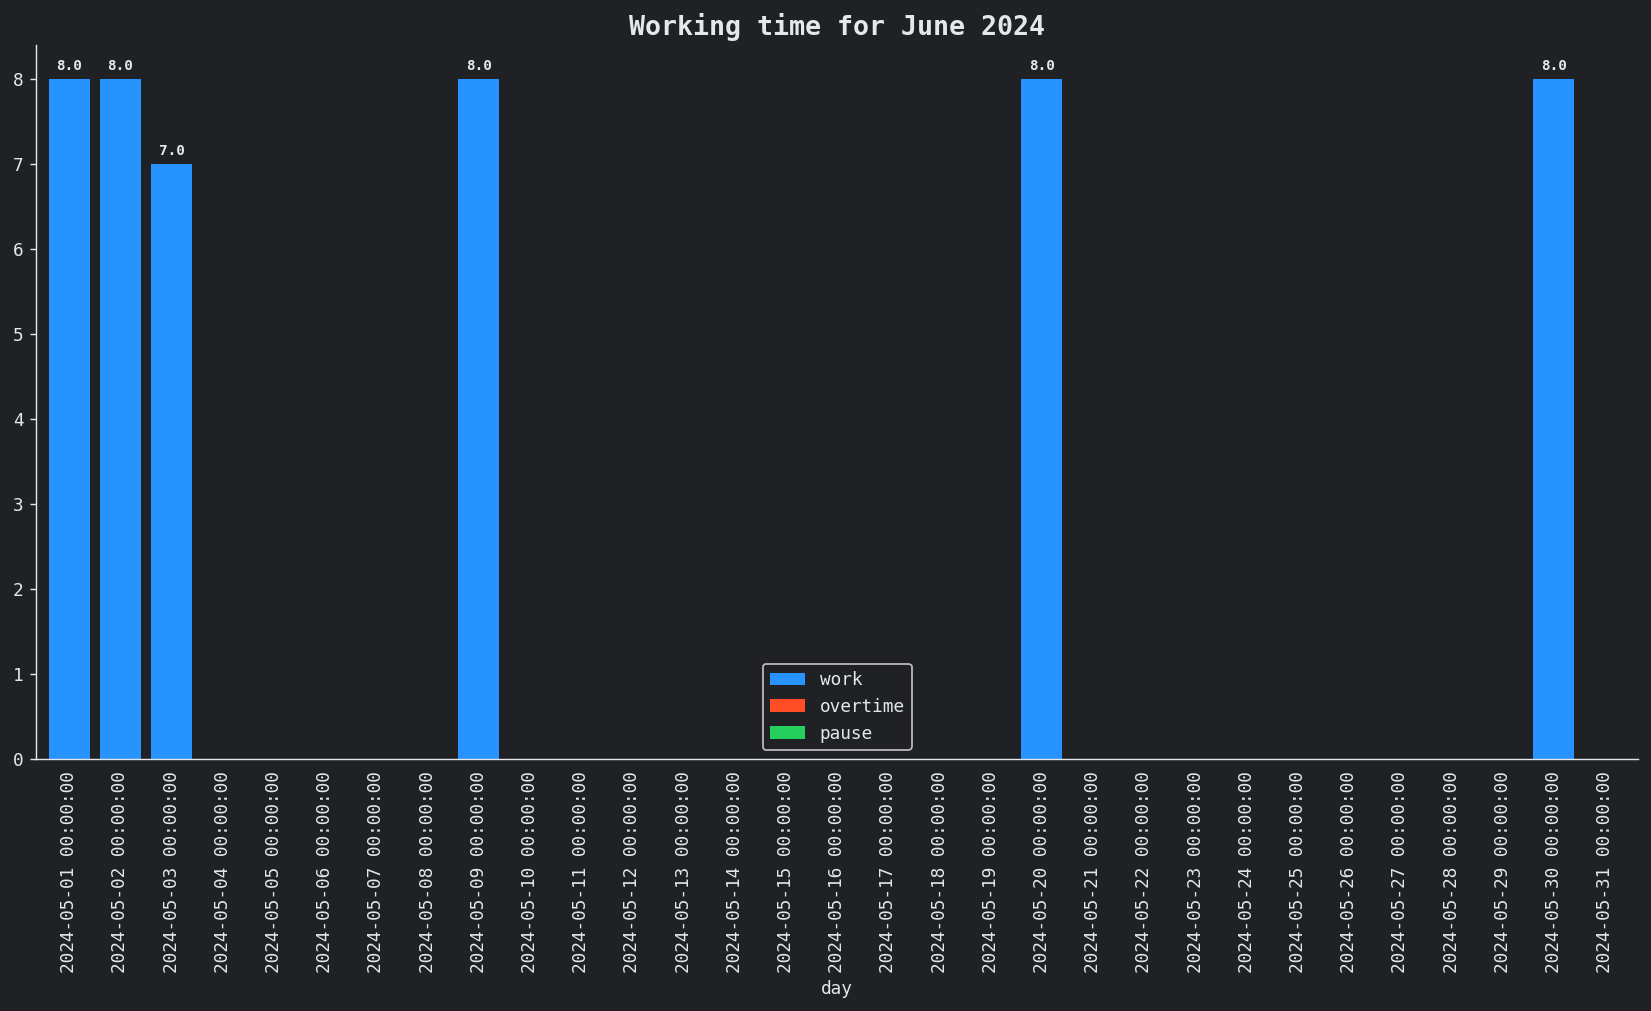

In [15]:
def adjust_df_for_plot(df: pd.DataFrame, needed_hours: float) -> pd.DataFrame:
    """Adjust the dataframe for plotting."""
    # check if df got pause column, else add it with 0
    if "pause" not in df.columns:
        df["pause"] = 0
    df["overtime"] = df["work"] - needed_hours
    df["overtime"] = df["overtime"].clip(lower=0)
    df["work"] = df["work"].clip(upper=needed_hours, lower=0)
    return df[["work", "overtime", "pause"]]


is_month = True

# clears the old values and then adds a subplot to insert all the data
fig = plt.figure(figsize=(13, 8), dpi=128, tight_layout=True)
ax = fig.add_subplot(111)

needed_hours = 8
plot_df = adjust_df_for_plot(df2, needed_hours)
plot_df.plot.bar(stacked=True, ax=ax, width=0.8, color=["#2693ff", "#ff4e26", "#25cf5e"], zorder=2)

# Add numbers above the bars
for i, (index, row) in enumerate(plot_df.iterrows()):
    total_time = row["work"] + row["overtime"]
    if total_time <= 0:
        continue
    ax.annotate(f"{total_time:.1f}", (i, total_time + 0.01*8), ha="center", va="bottom", fontsize=8, weight='bold')

ax.legend(fancybox=True, framealpha=0.9)
# hide the x ticks
ax.tick_params(axis="x", which="both", bottom=False, top=False)

if is_month:
    title = f"Working time for {store.current_date.strftime('%B %Y')}"
else:
    title = f"Working time for {store.current_date.year}"
ax.set_title(title, weight="bold", fontsize=15)